In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

In [2]:
os.chdir('E:\\Python Foundation End to End Case Study E-Commerce Analytics Project\\5. Python Foundation End to End Case Study_E-Commerce Analytics Project')

In [3]:
customer=pd.read_csv('CUSTOMERS.csv')
g_loc=pd.read_csv('GEO_LOCATION.csv')
order_item=pd.read_csv('ORDER_ITEMS.csv')
order_payment=pd.read_csv('ORDER_PAYMENTS.csv')
order_ratings=pd.read_csv('ORDER_REVIEW_RATINGS.csv')
orders=pd.read_csv('ORDERS.csv')
products=pd.read_csv('PRODUCTS.csv')
sellers=pd.read_csv('SELLERS.csv')


###  EDA

In [4]:
customer.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh


In [5]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [6]:
customer.shape

(99441, 5)

In [7]:
customer.size

497205

In [8]:
customer.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [9]:
customer.duplicated().sum()

0

In [10]:
customer.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 20
dtype: int64

In [11]:
g_loc.head(2)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,Akkarampalle,Andhra Pradesh
1,1046,-23.546081,-46.644820,Akkarampalle,Andhra Pradesh


In [12]:
g_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19015 entries, 0 to 19014
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   geolocation_zip_code_prefix  19015 non-null  int64  
 1   geolocation_lat              19015 non-null  float64
 2   geolocation_lng              19015 non-null  float64
 3   geolocation_city             19015 non-null  object 
 4   geolocation_state            19015 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 742.9+ KB


In [13]:
g_loc.shape

(19015, 5)

In [14]:
g_loc.size

95075

In [15]:
g_loc.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [16]:
g_loc.duplicated().sum()

0

In [17]:
order_item.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.9,19.93


In [18]:
order_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [19]:
order_item.shipping_limit_date=pd.to_datetime(order_item.shipping_limit_date,format='%m/%d/%Y %H:%M')

In [20]:
order_item.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

In [21]:
order_item.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [22]:
order_item.duplicated().sum()

0

In [23]:
order_payment.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [24]:
order_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [25]:
order_payment.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [26]:
order_payment.duplicated().sum()

0

In [27]:
order_ratings.head(2)

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,1/18/2018 0:00,1/18/2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,3/10/2018 0:00,3/11/2018 3:05


In [28]:
order_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_creation_date     100000 non-null  object
 4   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [29]:
order_ratings.review_creation_date=pd.to_datetime(order_ratings.review_creation_date,format='%m/%d/%Y %H:%M')
order_ratings.review_answer_timestamp=pd.to_datetime(order_ratings.review_answer_timestamp,format='%m/%d/%Y %H:%M')

In [30]:
order_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   review_id                100000 non-null  object        
 1   order_id                 100000 non-null  object        
 2   review_score             100000 non-null  int64         
 3   review_creation_date     100000 non-null  datetime64[ns]
 4   review_answer_timestamp  100000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 3.8+ MB


In [31]:
order_ratings.isnull().sum()

review_id                  0
order_id                   0
review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [32]:
order_ratings.duplicated().sum()

0

In [33]:
orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00


In [34]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [35]:
orders.order_purchase_timestamp=pd.to_datetime(orders.order_purchase_timestamp,format='%m/%d/%Y %H:%M')

In [36]:
orders.order_approved_at=pd.to_datetime(orders.order_approved_at,format='%m/%d/%Y %H:%M')

In [37]:
orders.order_delivered_carrier_date=pd.to_datetime(orders.order_delivered_carrier_date,format='%m/%d/%Y %H:%M')

In [38]:
orders.order_delivered_customer_date=pd.to_datetime(orders.order_delivered_customer_date,format='%m/%d/%Y %H:%M')

In [39]:
orders.order_estimated_delivery_date=pd.to_datetime(orders.order_estimated_delivery_date,format='%m/%d/%Y %H:%M')

In [40]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [41]:
(orders.isnull().sum()/len(orders))*100

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.160899
order_delivered_carrier_date     1.793023
order_delivered_customer_date    2.981668
order_estimated_delivery_date    0.000000
dtype: float64

In [42]:
orders.duplicated().sum()

0

In [43]:
products.head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


In [44]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32328 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [45]:
(products.isnull().sum()/len(products))*100

product_id                    0.000000
product_category_name         1.890686
product_name_lenght           1.851234
product_description_lenght    1.851234
product_photos_qty            1.851234
product_weight_g              0.006070
product_length_cm             0.006070
product_height_cm             0.006070
product_width_cm              0.006070
dtype: float64

In [46]:
products.duplicated().sum()

0

In [47]:
sellers.head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Alwal,Andhra Pradesh
1,d1b65fc7debc3361ea86b5f14c68d2e2,13023,Alwal,Andhra Pradesh


In [48]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3038 non-null   object
 3   seller_state            3038 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [49]:
(sellers.isnull().sum()/len(sellers))*100

seller_id                 0.00000
seller_zip_code_prefix    0.00000
seller_city               1.84168
seller_state              1.84168
dtype: float64

In [50]:
sellers.duplicated().sum()

0

In [51]:
final=pd.merge(left=order_ratings,right=orders,on='order_id',how='inner')
final=pd.merge(left=final,right=order_payment,on='order_id',how='inner')
final=pd.merge(left=final,right=order_item,on='order_id',how='inner')
final=pd.merge(left=final,right=products,on='product_id',how='inner')
final=pd.merge(left=final,right=sellers,on='seller_id',how='inner')
final=pd.merge(left=final,right=g_loc,left_on='seller_zip_code_prefix',right_on='geolocation_zip_code_prefix',how='inner')
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118050 entries, 0 to 118049
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   review_id                      118050 non-null  object        
 1   order_id                       118050 non-null  object        
 2   review_score                   118050 non-null  int64         
 3   review_creation_date           118050 non-null  datetime64[ns]
 4   review_answer_timestamp        118050 non-null  datetime64[ns]
 5   customer_id                    118050 non-null  object        
 6   order_status                   118050 non-null  object        
 7   order_purchase_timestamp       118050 non-null  datetime64[ns]
 8   order_approved_at              118035 non-null  datetime64[ns]
 9   order_delivered_carrier_date   116800 non-null  datetime64[ns]
 10  order_delivered_customer_date  115466 non-null  datetime64[ns]
 11  

In [52]:
(final.isnull().sum()/len(final))*100

review_id                        0.000000
order_id                         0.000000
review_score                     0.000000
review_creation_date             0.000000
review_answer_timestamp          0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.012706
order_delivered_carrier_date     1.058873
order_delivered_customer_date    2.188903
order_estimated_delivery_date    0.000000
payment_sequential               0.000000
payment_type                     0.000000
payment_installments             0.000000
payment_value                    0.000000
order_item_id                    0.000000
product_id                       0.000000
seller_id                        0.000000
shipping_limit_date              0.000000
price                            0.000000
freight_value                    0.000000
product_category_name            1.468022
product_name_lenght              1

In [53]:
final.dropna(inplace=True)
final.isnull().sum()

review_id                        0
order_id                         0
review_score                     0
review_creation_date             0
review_answer_timestamp          0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm   

In [54]:
final.duplicated().sum()

0

In [55]:
final.head(2)

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18,2018-01-18 21:46:00,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:00,2018-01-11 15:47:00,2018-01-12 21:57:00,...,30.0,35.0,14600,Kandukur,Andhra Pradesh,14600,-20.581177,-47.858931,Kandukur,Andhra Pradesh
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18,2018-01-18 21:46:00,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:00,2018-01-11 15:47:00,2018-01-12 21:57:00,...,30.0,35.0,14600,Kandukur,Andhra Pradesh,14600,-20.581177,-47.858931,Kandukur,Andhra Pradesh


### 1. Perform Detailed exploratory analysis
### a. Define & calculate high level metrics like (Total Revenue, Total quantity, Total  products, Total categories, Total sellers, Total locations, Total channels, Total payment methods etc…)

In [56]:
final=final.rename(columns={'order_item_id':'Qty'})

In [57]:
##  total revenue 
#Using payment_value (Total amount paid by customers including any additional costs)
total_revenue=final['payment_value'].sum()

In [58]:
##Using price (Only the price of products sold)
revenue=final.price.sum()

In [59]:
print("Total revenue:", final.payment_value.sum())
print("Total Quantity:", final.Qty.sum())
print("Total products:", final.product_id.nunique())
print("Total products_categories:", final.product_category_name.nunique())
print("Total sellers:", final.seller_id.nunique())
print("Total locations:", final.geolocation_zip_code_prefix.nunique())
print("Total channels:", final.order_status.nunique())
print("Total payment methods:", final.payment_type.nunique())

Total revenue: 19174545.66
Total Quantity: 134450
Total products: 31022
Total products_categories: 71
Total sellers: 2850
Total locations: 2072
Total channels: 2
Total payment methods: 4


### b. Understanding how many new customers acquired every month


In [60]:
final['Yr-Mo'] = final['order_delivered_customer_date'].dt.strftime('%Y-%m')
final['count_orders'] = 1
cust = final[['order_id','count_orders','Yr-Mo']].groupby(by=['order_id', 'Yr-Mo']).agg({'count_orders': 'sum'}).reset_index()

cust_new = cust[cust['count_orders'] <= 1].groupby('Yr-Mo').agg({'order_id': 'count'}).reset_index()
cust_new = cust_new.rename(columns={'order_id': 'new_customers'})
cust_new.head()

,Yr-Mo,new_customers
0,2016-10,178
1,2016-11,45
2,2016-12,4
3,2017-01,248
4,2017-02,1104


In [61]:
#final1=final.groupby(by='order_id').order_id.count().rename('number').reset_index()
#final=pd.merge(left=final,right=final1,on='order_id',how='inner')

In [62]:
#c1 = final[['order_id','number','Yr-Mo']].groupby(by=['order_id','Yr-Mo']).sum().reset_index()

#c2 = c1[c1['number']<= 1].groupby('Yr-Mo').agg({'order_id':'count'})
#c2 = c2.rename(columns={'order_id':'new_customers'})



### c. Understand the retention of customers on month on month basis

In [63]:
cust_retain = cust[cust['count_orders'] > 1].groupby('Yr-Mo').agg({'order_id': 'count'}).reset_index()
cust_retain = cust_new.rename(columns={'order_id': 'old_customers'})
cust_retain.head()

,Yr-Mo,new_customers
0,2016-10,178
1,2016-11,45
2,2016-12,4
3,2017-01,248
4,2017-02,1104


### d. How the revenues from existing/new customers on month on month basis

In [64]:
final['revenue']=final['price']+final['freight_value']

In [65]:
cust1 = final[['order_id','count_orders','Yr-Mo','revenue']].groupby(by=['order_id', 'Yr-Mo']).agg({'count_orders': 'sum','revenue':'sum'}).reset_index()
cust_retain1 = cust1[cust1['count_orders'] > 1].groupby('Yr-Mo').agg({'order_id':'count','revenue':'sum'}).reset_index()
cust_retain1.rename(columns={'order_id':'count_retained','revenue':'retained_revenue'},inplace=True)
cust_retain1.head()

,Yr-Mo,count_retained,retained_revenue
0,2016-10,28,6618.56
1,2016-11,14,4802.16
2,2017-01,32,11430.39
3,2017-02,189,55302.57
4,2017-03,313,91347.65


In [66]:
cust_new1 = cust1[cust1['count_orders'] <= 1].groupby('Yr-Mo').agg({'order_id': 'count','revenue':'sum'}).reset_index()
cust_new1.rename(columns={'order_id':'count_new','revenue':'new_revenue'},inplace=True)

In [67]:
pd.concat([cust_retain1,cust_new1],axis=1).head(3)

,Yr-Mo,count_retained,retained_revenue,Yr-Mo,count_new,new_revenue
0,2016-10,28.0,6618.56,2016-10,178,29186.65
1,2016-11,14.0,4802.16,2016-11,45,7794.17
2,2017-01,32.0,11430.39,2016-12,4,960.85


### e. Understand the trends/seasonality of sales, quantity by category, location, month, week, day, time, channel, payment method etc…

In [68]:
final['year']=final['order_purchase_timestamp'].dt.strftime('%Y')
final['month']=final['order_purchase_timestamp'].dt.strftime('%m')
final['week']=final['order_purchase_timestamp'].dt.strftime('%w')
final['day']=final['order_purchase_timestamp'].dt.strftime('%d')

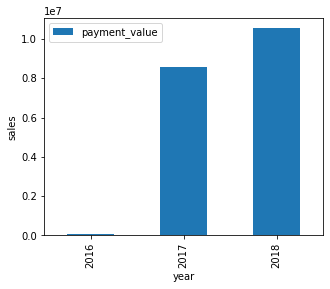

In [69]:
yearly=final[['year','payment_value']].groupby(by=['year']).sum()
yearly.plot(kind='bar',xlabel='year',ylabel='sales',figsize=(5,4))
plt.show()

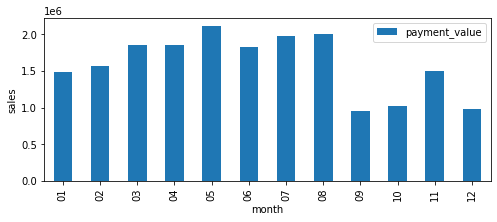

In [70]:
monthly=final[['month','payment_value']].groupby(by=['month']).sum()
monthly.plot(kind='bar',xlabel='month',ylabel='sales',figsize=(8,3))
plt.show()

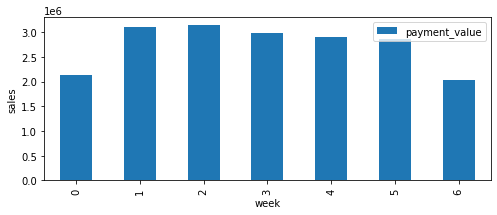

In [71]:
weekly=final[['week','payment_value']].groupby(by=['week']).sum()
weekly.plot(kind='bar',xlabel='week',ylabel='sales',figsize=(8,3))
plt.show()

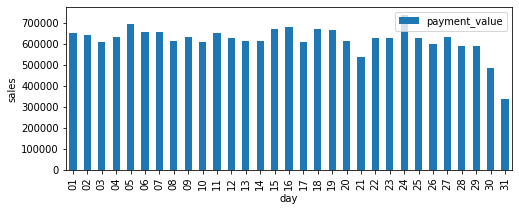

In [72]:
daily=final[['day','payment_value']].groupby(by=['day']).sum()
daily.plot(kind='bar',xlabel='day',ylabel='sales',figsize=(8,3))
plt.show()

In [73]:
qty=final[['Qty','product_category_name','payment_value']].groupby(by='product_category_name').sum().reset_index()
qty.head(2)

,product_category_name,Qty,payment_value
0,Agro_Industry_And_Commerce,307,115430.02
1,Air_Conditioning,355,88669.59


In [74]:
loc=final[['Qty', 'geolocation_state','payment_value','product_category_name']].groupby(by=['product_category_name','geolocation_state']).sum().reset_index()
loc.head(2)

,product_category_name,geolocation_state,Qty,payment_value
0,Agro_Industry_And_Commerce,Andhra Pradesh,250,109470.77
1,Agro_Industry_And_Commerce,Chhattisgarh,35,3163.85


In [75]:
p_type=final[['Qty','payment_type','payment_value']].groupby(by=['payment_type']).sum().reset_index()
p_type

,payment_type,Qty,payment_value
0,UPI,27335,3824275.99
1,credit_card,98447,14729132.45
2,debit_card,1855,235457.27
3,voucher,6813,385679.95


### f. Popular Products by month, seller, state, category.

In [76]:
p=final[['geolocation_state','Qty','product_id']].groupby(by=['geolocation_state','product_id']).\
sum().sort_values(by='Qty',ascending=False).reset_index()
p.drop_duplicates('geolocation_state').head(2)

,geolocation_state,product_id,Qty
0,Andhra Pradesh,422879e10f46682990de24d770e7f83d,826
2,Gujarat,99a4788cb24856965c36a24e339b6058,576


In [77]:
p1=final[['month','product_id','Qty']].groupby(by=['month','product_id']).sum().\
sort_values(by='Qty',ascending=False).reset_index()
p1.drop_duplicates('month').head(2)

,month,product_id,Qty
0,02,ee3d532c8a438679776d222e997606b3,215
1,08,9571759451b1d780ee7c15012ea109d4,210


In [78]:
p2=final[['seller_id','product_id','Qty']].groupby(by=['seller_id','product_id']).sum().\
sort_values(by='Qty',ascending=False).reset_index()
p2.drop_duplicates('seller_id').head(2)

,seller_id,product_id,Qty
0,1f50f920176fa81dab994f9023523100,422879e10f46682990de24d770e7f83d,826
1,955fee9216a65b617aa5c0531780ce60,aca2eb7d00ea1a7b8ebd4e68314663af,642


In [79]:
p3=final[['product_id','product_category_name','Qty']].groupby(by=['product_id','product_category_name']).sum().\
sort_values(by='Qty',ascending=False).reset_index()
p3.drop_duplicates('product_category_name').head(2)

,product_id,product_category_name,Qty
0,422879e10f46682990de24d770e7f83d,Garden_Tools,826
1,aca2eb7d00ea1a7b8ebd4e68314663af,Furniture_Decor,642


### g. Popular categories by state, month

In [80]:
popcatbystate=final.groupby(['geolocation_state','product_category_name']).product_category_name.count().rename('count').reset_index()
popcatbystate.sort_values(by='count',ascending=False).drop_duplicates('geolocation_state').reset_index().drop(columns='index').head(2)

,geolocation_state,product_category_name,count
0,Andhra Pradesh,Health_Beauty,7654
1,Gujarat,Bed_Bath_Table,6535


In [81]:
popcatbymonth=final.groupby(['year','month','product_category_name']).product_category_name.count().rename('count').reset_index()
popcatbymonth.sort_values(by=['year','month','count'],ascending=[True,True,False]).drop_duplicates(['year','month']).reset_index().drop(columns='index').head(2)

,year,month,product_category_name,count
0,2016,10,Furniture_Decor,78
1,2016,12,Fashion_Bags_Accessories,1


### h. List top 10 most expensive products sorted by price


In [82]:
final[['product_id','price']].groupby(by='product_id').mean().sort_values(by='price',ascending=False).reset_index().head(10)

,product_id,price
0,489ae2aa008f021502940f251d4cce7f,6735.00
1,69c590f7ffc7bf8db97190b6cb6ed62e,6729.00
2,1bdf5e6731585cf01aa8169c7028d6ad,6499.00
3,a6492cc69376c469ab6f61d8f44de961,4799.00
4,c3ed642d592594bb648ff4a04cee2747,4690.00
5,259037a6a41845e455183f89c5035f18,4590.00
6,a1beef8f3992dbd4cd8726796aa69c53,4399.87
7,6cdf8fc1d741c76586d8b6b15e9eef30,4099.99
8,6902c1962dd19d540807d0ab8fade5c6,3999.90
9,4ca7b91a31637bd24fb8e559d5e015e4,3999.00


### 2. Performing Customers/sellers Segmentation
### a. Divide the customers into groups based on the revenue generated

In [109]:
final.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,geolocation_city,geolocation_state,Yr-Mo,count_orders,revenue,year,month,week,day,month_new
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18,2018-01-18 21:46:00,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:00,2018-01-11 15:47:00,2018-01-12 21:57:00,...,Kandukur,Andhra Pradesh,2018-01,1,198.63,2018,01,4,11,01
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18,2018-01-18 21:46:00,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:00,2018-01-11 15:47:00,2018-01-12 21:57:00,...,Kandukur,Andhra Pradesh,2018-01,1,198.63,2018,01,4,11,01
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10,2018-03-11 03:05:00,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:00,2018-02-28 12:48:00,2018-03-02 19:08:00,...,Bobbili,Andhra Pradesh,2018-03,1,88.09,2018,02,3,28,03
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17,2018-02-18 14:36:00,e226dfed6544df5b7b87a48208690feb,delivered,2018-02-03 09:56:00,2018-02-03 10:33:00,2018-02-06 16:18:00,...,Dalurband,West Bengal,2018-02,1,194.12,2018,02,6,03,02
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21,2017-04-21 22:02:00,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered,2017-04-09 17:41:00,2017-04-09 17:55:00,2017-04-10 14:24:00,...,Dalurband,West Bengal,2017-04,1,222.84,2017,04,0,09,04


In [84]:
cust_grp = final.groupby('customer_id')[['payment_value']].sum().reset_index().rename(columns={'payment_value':'Revenue'})

In [111]:
cust_grp['decile_grp']=pd.cut(cust_grp.Revenue,bins=3,labels=['low','medium','high'])
cust_grp

,customer_id,Revenue,decile_grp
0,00012a2ce6f8dcda20d059ce98491703,114.74,low
1,000161a058600d5901f007fab4c27140,67.41,low
2,0001fd6190edaaf884bcaf3d49edf079,195.42,low
3,0002414f95344307404f0ace7a26f1d5,179.35,low
4,000379cdec625522490c315e70c7a9fb,107.01,low
...,...,...,...
93569,fffcb937e9dd47a13f05ecb8290f4d3e,91.91,low
93570,fffecc9f79fd8c764f843e9951b11341,81.36,low
93571,fffeda5b6d849fbd39689bb92087f431,63.13,low
93572,ffff42319e9b2d713724ae527742af25,214.13,low


In [119]:
customer_revenue = final.groupby('customer_id')['payment_value'].sum().reset_index()
customer_revenue.columns = ['customer_id', 'total_revenue_customer']
# Divide Customers into Revenue Groups
customer_revenue['revenue_group'] = pd.cut(customer_revenue['total_revenue_customer'], bins=3, labels=['low', 'medium', 'high'])
# Perform Decile Analysis on Customer Revenue
customer_revenue['decile_rank'] = pd.qcut(customer_revenue['total_revenue_customer'], q=10, labels=False)+1

### b. Divide the sellers into groups based on the revenue generated 

In [120]:
sell_grp = final.groupby('seller_id')[['payment_value']].sum().reset_index().rename(columns={'payment_value':'Revenue'})

In [121]:
sell_grp['decile_grp']=pd.cut(sell_grp.Revenue,bins=3,labels=['low','medium','high'])

In [122]:
customer_revenue = final.groupby('seller_id')['payment_value'].sum().reset_index()
customer_revenue.columns = ['seller_id', 'total_revenue_customer']
# Divide Customers into Revenue Groups
customer_revenue['revenue_group'] = pd.cut(customer_revenue['total_revenue_customer'], bins=3, labels=['low', 'medium', 'high'])
# Perform Decile Analysis on Customer Revenue
customer_revenue['decile_rank'] = pd.qcut(customer_revenue['total_revenue_customer'], q=10, labels=False)+1

### 3. Cross-Selling (Which products are selling together)
Hint: We need to find which of the top 10 combinations of products are selling together in each transaction. (combination of 2 or 3 buying together)

In [90]:
# Cross Selling in terms of same Order_ID ,buying 2or 2product_id buying at Same time

In [91]:
#cross_sell =final.loc[: , ['order_id','order_purchase_timestamp','product_id','product_category_name']]
#cross_sell = cross_sell[cross_sell.duplicated(subset = ['order_id','order_purchase_timestamp'], keep = False)]

In [92]:
#cross_sell_1 = cross_sell.drop_duplicates(subset=['order_id','order_purchase_timestamp'], keep='first', ignore_index=True)

In [93]:
#cross_sell_2 = cross_sell.drop_duplicates(subset=['order_id','order_purchase_timestamp'], keep='last', ignore_index=True)

In [94]:
#cross_sell_final = pd.merge(cross_sell_1, cross_sell_2, on = ['order_id','order_purchase_timestamp'], how = 'inner')

In [129]:
from itertools import combinations
from collections import Counter
order_products = final.groupby('order_id')['product_category_name'].apply(list).reset_index()
combinations_list = []
for products in order_products['product_category_name']:
    if len(products) >= 2:
        for r in range(2, min(4, len(products) + 1)):
            combinations_list.extend(combinations(products, r))
combination_counts = Counter(combinations_list)
top_combinations = combination_counts.most_common(10)
top_combinations



[(('Bed_Bath_Table', 'Bed_Bath_Table', 'Bed_Bath_Table'), 22279),
 (('Office_Furniture', 'Office_Furniture', 'Office_Furniture'), 9599),
 (('Bed_Bath_Table', 'Bed_Bath_Table', 'Housewares'), 6392),
 (('Bed_Bath_Table', 'Housewares', 'Bed_Bath_Table'), 6164),
 (('Bed_Bath_Table', 'Bed_Bath_Table'), 5893),
 (('Housewares', 'Bed_Bath_Table', 'Bed_Bath_Table'), 5532),
 (('Furniture_Decor', 'Furniture_Decor', 'Furniture_Decor'), 5234),
 (('Housewares', 'Housewares', 'Housewares'), 4953),
 (('Computers_Accessories', 'Computers_Accessories', 'Computers_Accessories'),
  4866),
 (('Furniture_Decor', 'Furniture_Decor'), 4369)]

### 4. Payment Behaviour
### a. How customers are paying?
### b. Which payment channels are used by most customers?

In [130]:
a=final[['customer_id','payment_installments']].groupby(by='payment_installments').count().sort_values(by='payment_installments',ascending=True).\
reset_index().rename(columns={'customer_id':'count_cust'}).head()
a

,payment_installments,count_cust
0,0,3
1,1,55982
2,2,13079
3,3,11230
4,4,7631


In [131]:
b = final.groupby('payment_type')[['payment_type']].count().rename(columns={'payment_type':'No_of_transaction'}).sort_values(by = 'No_of_transaction',ascending = False).reset_index()

In [132]:
b

,payment_type,No_of_transaction
0,credit_card,82812
1,UPI,21825
2,voucher,5997
3,debit_card,1600


### 5. Customer satisfaction towards category & product
### a. Which categories (top 10) are maximum rated & minimum rated?
### b. Which products (top10) are maximum rated & minimum rated?
### c. Average rating by location, seller, product, category, month etc.

In [133]:
cat_rev = final.groupby('product_category_name')[['review_score']].mean().reset_index().sort_values(by='review_score')
print("Product Categories with Minimum Avg Rating")
cat_rev.head(10)

Product Categories with Minimum Avg Rating


,product_category_name,review_score
61,Security_And_Services,2.500000
23,Diapers_And_Hygiene,3.378378
46,Home_Comfort_2,3.387097
57,Office_Furniture,3.484230
30,Fashion_Male_Clothing,3.630435
34,Fixed_Telephony,3.739464
52,La_Cuisine,3.785714
4,Audio,3.828496
40,Furniture_Living_Room,3.862069
41,Furniture_Mattress_And_Upholstery,3.875000


In [134]:
cat_rev = final.groupby('product_category_name')[['review_score']].mean().reset_index().sort_values(by='review_score',ascending=False)
print("Product Categories with Maximum Avg Rating")
cat_rev.head(10)

Product Categories with Maximum Avg Rating


,product_category_name,review_score
29,Fashion_Childrens_Clothes,5.000000
11,Cds_Dvds_Musicals,4.642857
9,Books_Imported,4.525424
8,Books_General_Interest,4.494505
64,Small_Appliances_Home_Oven_And_Coffee,4.453333
10,Books_Technical,4.388060
37,Food_Drink,4.387900
22,Costruction_Tools_Tools,4.333333
32,Fashion_Sport,4.321429
53,Luggage_Accessories,4.317747


### b. Which products (top10) are maximum rated & minimum rated?

In [135]:
print('Minimum Rated 10 products')
final.groupby('product_id')[['review_score']].mean().reset_index().sort_values(by= 'review_score').head(10)

Minimum Rated 10 products


,product_id,review_score
26405,d9933dd922fa78131c80a6987a707f9a,1.0
7510,3d16ff6bb87ceb3db735862f069c3caf,1.0
18742,9ad035c24a9a92391b9e4be7d07879fd,1.0
18729,9aac694a7dea5e7fe19c5c65ecd0058e,1.0
13769,70d1bd3a042448105a71d0b41ecbc96b,1.0
29818,f605c14485b0c4f34011ee7658887ef1,1.0
29817,f5f8b37f379db82195a477981fdd5ccd,1.0
13771,70d581e7cfecc88d345ee9c197d1fbc8,1.0
27767,e527af42fb2b8d253e47fdb6e7af7db9,1.0
18723,9a9a9db03d984059e843b4f3cb5688d0,1.0


In [136]:
print('Maximum Rated 10 products')
final.groupby('product_id')['review_score'].mean().reset_index().sort_values(by = 'review_score', ascending = False).head(10)

Maximum Rated 10 products


,product_id,review_score
0,00066f42aeeb9f3007548bb9d3f33c38,5.0
16456,877e380ee3bca2827be3586e9d4b7c84,5.0
16511,87e6cf7eb3e4996b725323a1d704fb8b,5.0
16504,87d87bc896790e32575a4a78c8ccb983,5.0
16500,87d0c9b6b7e52840a7f3d9aa0efb0003,5.0
16495,87c8fb5d5bb43fd06e54c78f6fa45836,5.0
16493,87c070a9069fffd77616e3581d8d2ba1,5.0
16492,87bd1cd9f8c9d38c5a2428d5d2c5aecd,5.0
16488,87b489e8ad10cd2b4e631cc1af34ff00,5.0
16487,87b42927619008f877bfcdd5068e7edf,5.0


### c. Average rating by location, seller, product, category, month etc.

In [137]:
final['month_new']= final.review_creation_date.dt.strftime("%m")
final.groupby('month_new')[['review_score']].mean().reset_index().head()

,month_new,review_score
0,01,4.021493
1,02,4.037991
2,03,3.784194
3,04,3.933001
4,05,4.143979


In [138]:
final.groupby('Yr-Mo')[['review_score']].mean().reset_index().head()

,Yr-Mo,review_score
0,2016-10,3.909449
1,2016-11,3.707317
2,2016-12,3.000000
3,2017-01,4.211765
4,2017-02,4.293275


In [139]:
final.groupby('seller_id')[['review_score']].mean().reset_index().head()

,seller_id,review_score
0,0015a82c2db000af6aaaf3ae2ecb0532,3.666667
1,001cca7ae9ae17fb1caed9dfb1094831,3.944915
2,002100f778ceb8431b7a1020ff7ab48f,4.086207
3,004c9cd9d87a3c30c522c48c4fc07416,4.143713
4,00720abe85ba0859807595bbf045a33b,3.653846


In [140]:
final.groupby('geolocation_state')[['review_score']].mean().reset_index().head()

,geolocation_state,review_score
0,Andhra Pradesh,4.075691
1,Arunachal Pradesh,4.236264
2,Chhattisgarh,4.176588
3,Delhi,4.018304
4,Gujarat,3.950434


In [141]:
final.groupby('product_id')[['review_score']].mean().reset_index().head()

,product_id,review_score
0,00066f42aeeb9f3007548bb9d3f33c38,5.0
1,00088930e925c41fd95ebfe695fd2655,4.0
2,0009406fd7479715e4bef61dd91f2462,1.0
3,000b8f95fcb9e0096488278317764d19,5.0
4,000d9be29b5207b54e86aa1b1ac54872,5.0


In [142]:
final.groupby('product_category_name')[['review_score']].mean().reset_index().head()

,product_category_name,review_score
0,Agro_Industry_And_Commerce,4.225410
1,Air_Conditioning,3.993127
2,Art,4.020000
3,Arts_And_Craftmanship,4.125000
4,Audio,3.828496
